https://www.kaggle.com/competitions/playground-series-s3e13/data?select=test.csv"

Cool solution
https://www.kaggle.com/code/davidcoxon/complete-eda-data-egineering-and-model-comparison

In [29]:
import pandas as pd
from pathlib import Path

# Download latest version
!kaggle competitions download -c playground-series-s3e13

#
#path = Path (kagglehub.dataset_download("https://www.kaggle.com/competitions/playground-series-s3e13/data?select=test.csv"))
#print ("Path to dataset files:", path)
#data_set_name = Path ("Titanic-Dataset.csv")
#s0 = pd.read_csv(path / data_set_name, header=None)
#s0

playground-series-s3e13.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
import zipfile
import pandas as pd

# Extract all contents of the ZIP file
with zipfile.ZipFile("playground-series-s3e13.zip", 'r') as zip_ref:
    zip_ref.extractall("playground-series-s3e13")

print("Files extracted successfully!")

test_name = Path ("test.csv")
train_name = Path ("train.csv")

test = pd.read_csv( "playground-series-s3e13" / test_name )
train = pd.read_csv( "playground-series-s3e13" / train_name )



Files extracted successfully!


In [31]:
import seaborn as sns

train.describe()



,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,353.000000,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,...,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,204.237607,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,...,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,353.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,529.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,706.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import random
random_seed = 32
random.seed(random_seed)

y = train["prognosis"]
y = y.to_frame()
X = train.drop (columns = ["prognosis"])

X = X.drop (columns = ["id"])

label_encoder = LabelEncoder()

#y = label_encoder.fit_transform (y)
#y = np.DataFrame(y).to_frame()
#y = pd.DataFrame(y)


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=random_seed)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(707, 64)
(707, 1)
(565, 64)
(565, 1)
(142, 64)
(142, 1)


<Axes: >

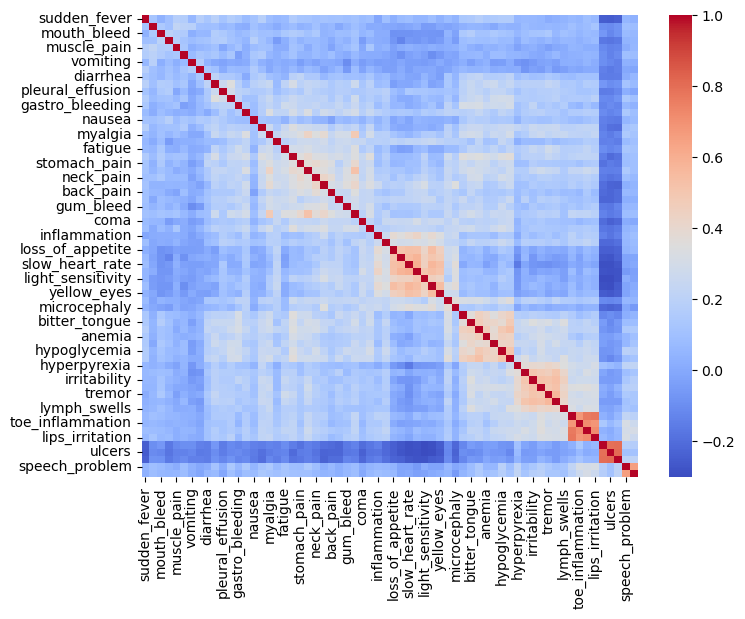

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 
#
#regressor_pipeline = Pipeline([
# ("preprocessing", preprocessing_pipeline),
#("regressor", LinearRegression())
#])
#
#
#

X_temp = X

correlation_matrix = X_temp.corr()

plt.figure(figsize=(8, 6))  # Set figure size

sns.heatmap(correlation_matrix,  cmap="coolwarm",)


#train_df.prognosis.value_counts()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


classifier_pipeline = Pipeline ([
    ("classifier", LogisticRegression(solver='sag',multi_class='ovr'))
])

print(X_train.shape)
print(y_train.shape)

classifier_pipeline.fit(X_train, y_train)

print ("Train Score Logistic regression sag, one ver rest", classifier_pipeline.score(X_train, y_train))
print ("Test Score Logistic regression sag, one ver rest", classifier_pipeline.score(X_test, y_test))

classifier_pipeline.score(X_test, y_test)

#classifier_pipeline.score(X_train, y_train)
#classifier_pipeline.score(X_test, y_test)

#classifier_pipeline = Pipeline (["classifier", KNeighborsClassifier()])


(565, 64)
(565, 1)
Train Score Logistic regression sag, one ver rest 0.552212389380531
Test Score Logistic regression sag, one ver rest 0.323943661971831


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.323943661971831

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


classifier_pipeline = Pipeline ([
    ("classifier", KNeighborsClassifier())
])

print(X_train.shape)
print(y_train.shape)

classifier_pipeline.fit(X_train, y_train)

print ("Train Score KN", classifier_pipeline.score(X_train, y_train))
print ("Test Score  KN", classifier_pipeline.score(X_test, y_test))

classifier_pipeline.score(X_test, y_test)

(565, 64)
(565, 1)
Train Score KN 0.4176991150442478


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Score  KN 0.3028169014084507


0.3028169014084507

In [39]:
classifier_pipeline.score(X_test, y_test)


0.323943661971831